# Encontrar los jugadores de fútbol con el mejor potencial a un precio asequible para venderlos posteriormente

## Autor: Gabriel García

### Objetivo: 

Encontrar los jugadores de fútbol que actualmente estén sub-valorados en el mercado, para comprarlos hoy y venderlos en dos años. 

#### Dataset 

Se tiene el conjunto de datos del juego fifa19, el cual refleja muy bien las características reales de los jugadores, además de tener el valor y salario actual de cada jugador.

#### Consideraciones iniciales:
Se paga el valor de Value y no el de Release Clause.
En el mercado no existe inflación, ni cambios salariales y cualquier jugador está dispuesto a aceptar las ofertas.


In [1]:
#Análisis y visualización de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Algoritmos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Selección y evaluación de modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Desempeño
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Para poder visualizar todas las filas y columnas del dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
fifa_df = pd.read_csv("fifadata.csv")

### Análisis inicial 

In [4]:
#El tamaño del dataset
fifa_df.shape

(18207, 89)

In [5]:
# Una vista de los 5 primeras filas del dataset
fifa_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# Breve descripción de datos cuantitativos
fifa_df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

* Edad media: 25 años
* Overall Percentil 75 o superior: > 71 
* Potencial Percentil 75 o superior: > 75


In [7]:
#Las columnas.
fifa_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
fifa_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### Feature engineering & Data Cleaning

Con fines prácticos tendré en cuenta los atributos basados en las habilidades del jugador (Overall, Potential, Crossing, Finishing, HeadingAccuracy, etc) y las características físicas (Age, Height, Weight, etc) para implementar el modelo. 

A pesar de que variables categóricas como 'Nationality' y/o 'Club' pueden ser útiles para predecir el precio, no se tendrán en cuenta por fines prácticos. 

In [9]:
# Eliminación de variables que no aportan valor al modelo 
fifa_df = fifa_df.drop(columns=['Unnamed: 0', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Special', 'Preferred Foot', 
                                'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until','LS', 'ST', 
                                'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                                'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],axis=1)

In [10]:
fifa_df.head()

,ID,Name,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,94,94,€110.5M,€565K,5.0,4.0,4.0,Medium/ Medium,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,94,94,€77M,€405K,5.0,4.0,5.0,High/ Low,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,92,93,€118.5M,€290K,5.0,5.0,5.0,High/ Medium,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,91,93,€72M,€260K,4.0,3.0,1.0,Medium/ Medium,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,91,92,€102M,€355K,4.0,5.0,4.0,High/ High,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


Las variables 'Value', 'Wage', 'Height' y 'Weight' contienen carácteres no numéricos, por lo que se modificarán. 

In [11]:
# Limpieza de carácteres no numéricos para 'Value', 'Wage', 'Height' y 'Weight'

fifa_df['Value'] = fifa_df['Value'].str.replace('€','')
fifa_df['Wage'] = fifa_df['Wage'].str.replace('€','')

for i,j in enumerate(fifa_df['Value']):
    if j[-1] == 'M':
        fifa_df['Value'][i] = float(j[:-1]) * 1000000
    elif j[-1] == 'K':
        fifa_df['Value'][i] = float(j[:-1]) * 1000
    else:
        fifa_df['Value'][i] = 0

for i,j in enumerate(fifa_df['Wage']):
    if j[-1] == 'K':
        fifa_df['Wage'][i] = float(j[:-1]) * 1000
    else:
        fifa_df['Wage'][i] = 0

fifa_df['Value'] = fifa_df['Value'].astype(float)
fifa_df['Wage'] = fifa_df['Wage'].astype(float)
fifa_df['Height'] = fifa_df['Height'].str.replace("'",".").astype(float)
fifa_df['Weight'] = fifa_df['Weight'].str.replace("lbs","").astype(float)

Las variables 'Work Rate' y 'Position' son las únicas no númericas que quedan, es conveniente declararlas como categóricas para implementar los modelos supervisados.

In [12]:
fifa_df['Work Rate'] = fifa_df['Work Rate'].astype(pd.api.types.CategoricalDtype(categories = ['Low/ Low','Low/ Medium','Low/ High','Medium/ Low','Medium/ Medium',
                                                                                               'Medium/ High','High/ Low','High/ Medium','High/ High']))
fifa_df['Position'] = fifa_df['Position'].astype("category")

In [13]:
#Se selecciona ID como el índice del Dataset
fifa_df.set_index("ID",inplace=True)

### Missing Values

Se realizará un análisis rápido de valores faltantes. 

<AxesSubplot:>

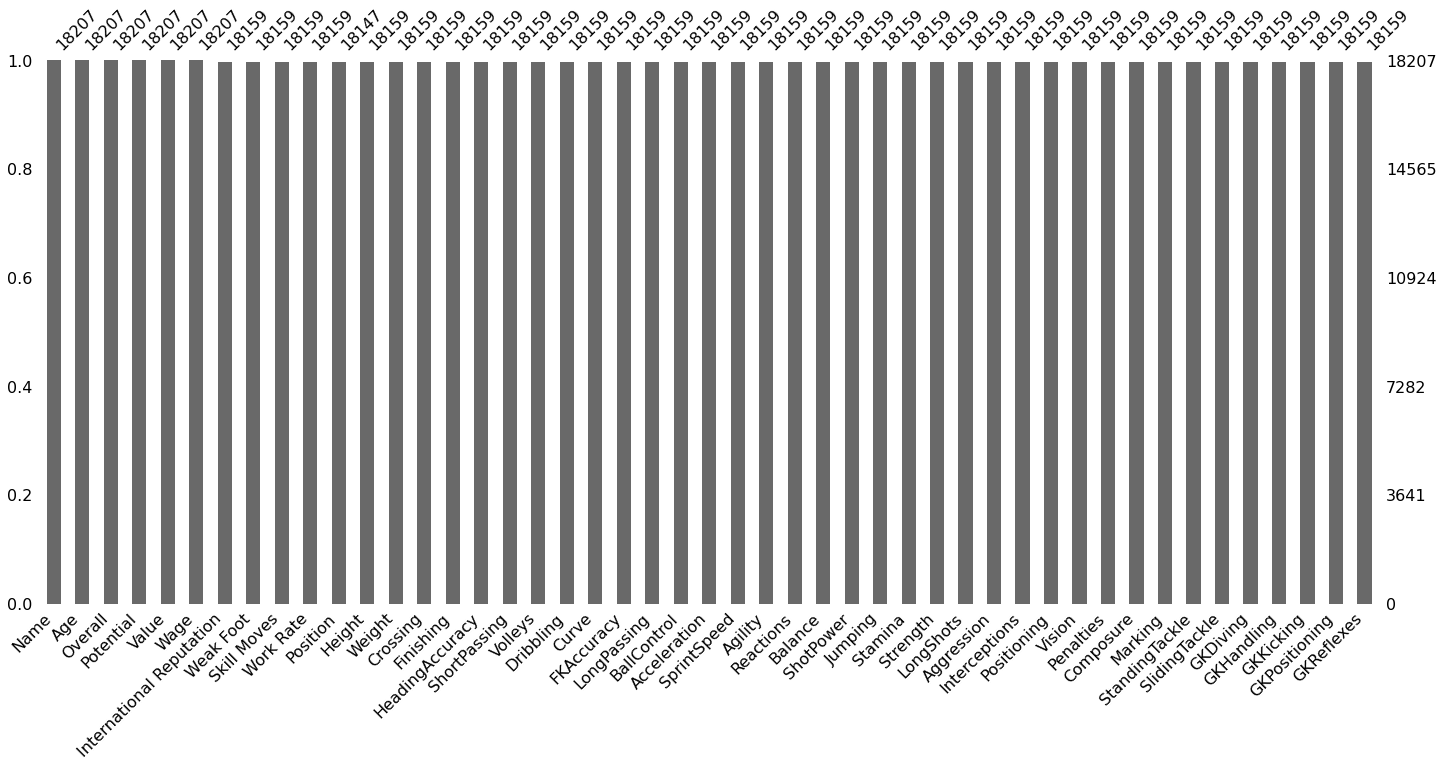

In [14]:
 msno.bar(fifa_df)

In [15]:
fifa_df.isnull().sum()

Name                         0
Age                          0
Overall                      0
Potential                    0
Value                        0
Wage                         0
International Reputation    48
Weak Foot                   48
Skill Moves                 48
Work Rate                   48
Position                    60
Height                      48
Weight                      48
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     48
ShotPower                   48
Jumping                     48
Stamina                     48
Strength                    48
LongShot

Un vistazo a los valores nulos...

In [16]:
null_fifa_df = fifa_df[fifa_df.isnull().any(axis=1)]


In [17]:
null_fifa_df.shape

(60, 47)

In [18]:
#Porcentaje de nulos con respecto al dataset total
(null_fifa_df.shape[0] / fifa_df.shape[0]) * 100

0.32954358213873786

In [19]:
null_fifa_df.head(10)

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
153160,R. Raldes,37,70,70,0.0,0.0,1.0,3.0,2.0,Medium/ Medium,NaN,5.11,172.0,25.0,36.0,72.0,56.0,19.0,41.0,32.0,51.0,33.0,57.0,47.0,46.0,59.0,66.0,58.0,74.0,58.0,53.0,75.0,47.0,74.0,65.0,26.0,48.0,77.0,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0
175393,J. Arce,33,68,68,0.0,0.0,1.0,3.0,3.0,High/ Low,NaN,5.90,154.0,64.0,73.0,65.0,64.0,52.0,67.0,40.0,36.0,50.0,70.0,71.0,74.0,73.0,61.0,75.0,61.0,63.0,73.0,41.0,61.0,48.0,36.0,67.0,63.0,69.0,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0
195905,L. Gutiérrez,33,67,67,0.0,0.0,1.0,3.0,2.0,Medium/ Medium,NaN,5.11,190.0,59.0,39.0,59.0,33.0,37.0,44.0,48.0,40.0,35.0,47.0,64.0,61.0,68.0,68.0,60.0,51.0,72.0,78.0,78.0,47.0,76.0,62.0,49.0,45.0,42.0,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0
226044,R. Vargas,23,66,69,0.0,0.0,1.0,4.0,3.0,High/ Low,NaN,5.70,143.0,52.0,70.0,54.0,57.0,63.0,74.0,57.0,41.0,53.0,72.0,71.0,73.0,79.0,63.0,91.0,62.0,75.0,80.0,33.0,59.0,26.0,17.0,70.0,56.0,67.0,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0
216751,D. Bejarano,26,65,66,0.0,0.0,1.0,2.0,2.0,Medium/ Medium,NaN,5.90,154.0,72.0,48.0,44.0,66.0,31.0,57.0,31.0,29.0,64.0,59.0,68.0,61.0,54.0,65.0,76.0,24.0,58.0,56.0,47.0,29.0,57.0,63.0,38.0,32.0,39.0,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0
177971,J. McNulty,33,62,62,120000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195380,J. Barrera,29,62,62,300000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139317,J. Stead,35,62,62,140000.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240437,A. Semprini,20,62,72,425000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se podría realizar algún proceso de imputación para aquellas muestras donde les falta únicamente el valor de la posición, pero de nuevo, pensando en fines prácticos y dado que son pocos los casos de valores nulos (<0.4%) procedo a eliminarlos. 

In [20]:
#Eliminación de valores nulos. 
fifa_df = fifa_df.dropna()

In [21]:
fifa_df.shape

(18147, 47)

Considero que es importante agregar una nueva variable que resulte de restar el potencial de un jugador con su nivel general. Para obtener un solo valor que asocie las dos variables. </br>
La variable se llamará: 'Potential difference'

In [22]:
fifa_df['Potential difference'] = fifa_df['Potential']-fifa_df['Overall']

### Análisis exploratorio de datos

Me gustaría realizar una serie de visualizaciones de datos con fines de entender un poco mejor el dataset

<AxesSubplot:>

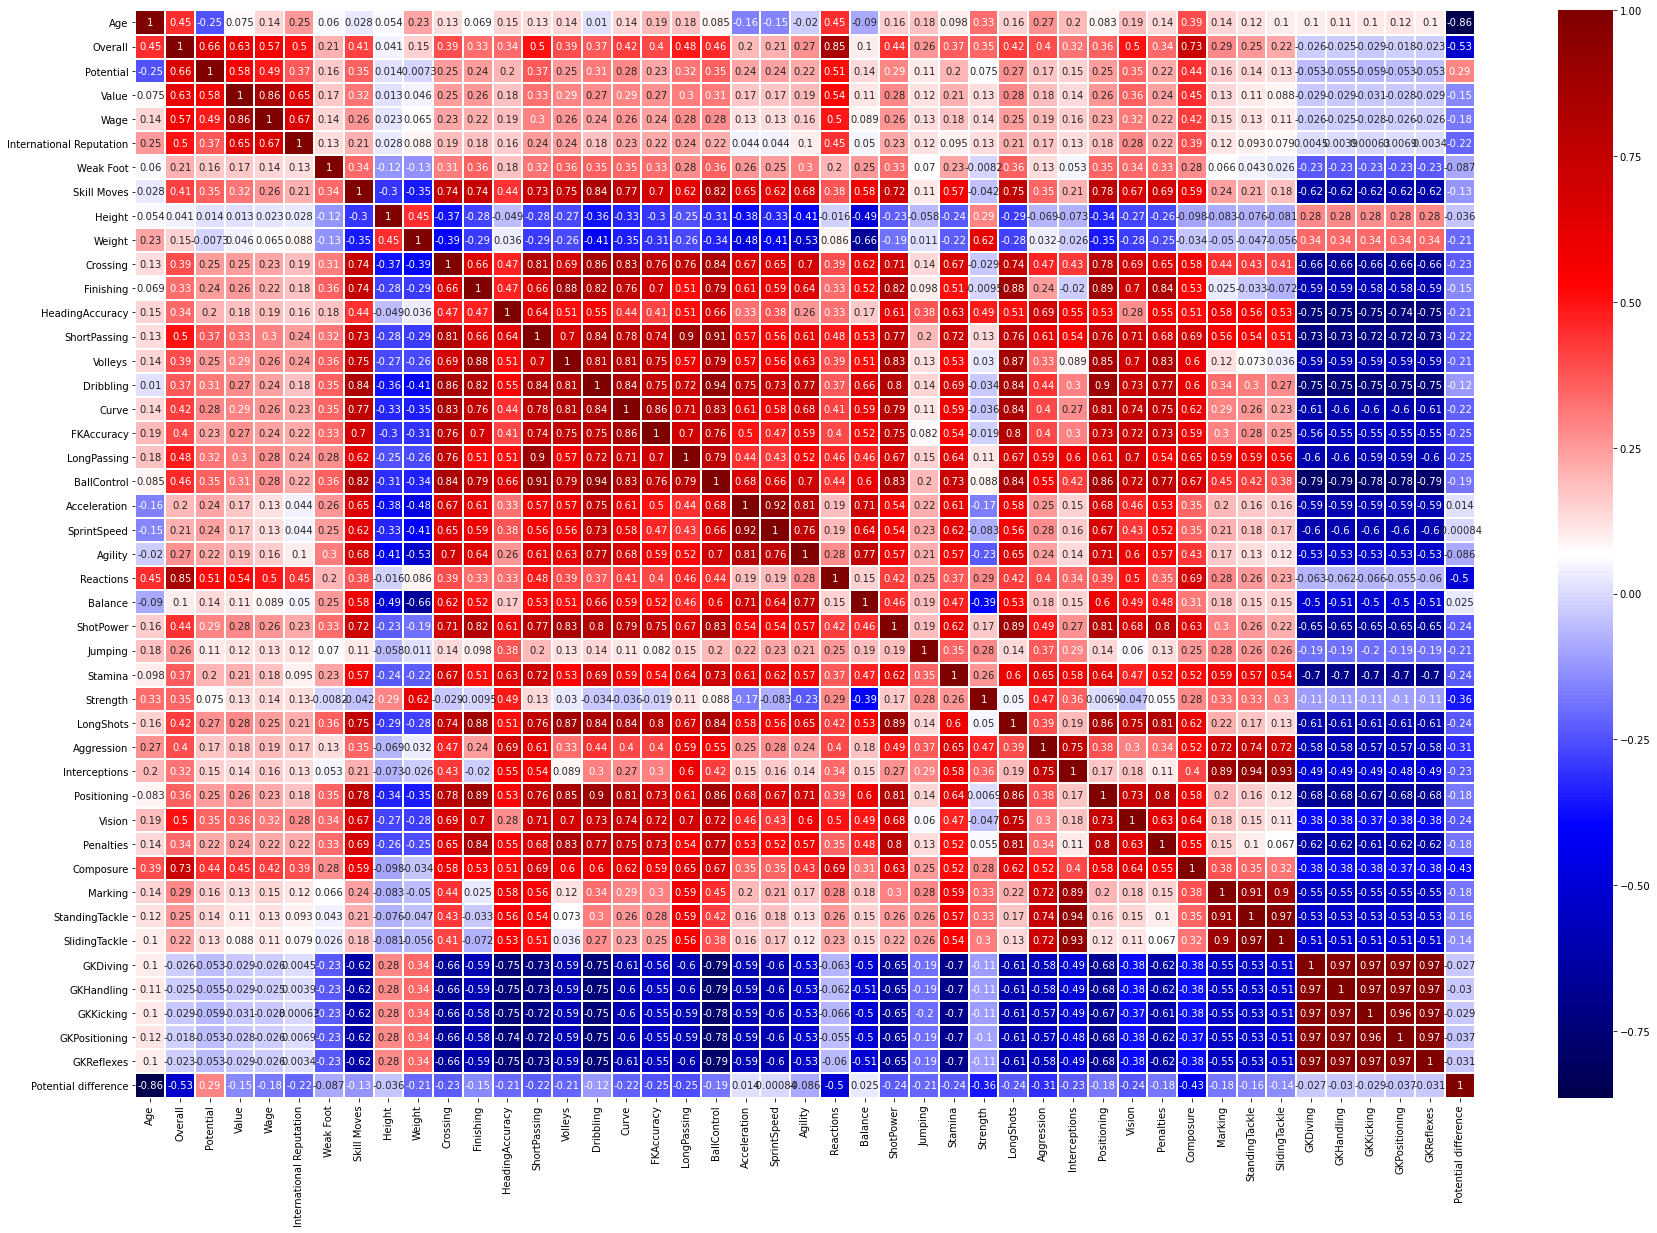

In [23]:
#Matriz de correlaciones
corr_matrix = fifa_df.corr()
fig = plt.figure(figsize=[30,20])
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',annot=True)

Observamos que hay una correlación positiva muy fuerte entre lo que vale un jugador y su salario. Por lo que pienso que sería una de las mejores variables que ayudaría a determinar el precio de un jugador. 

Text(0.5, 1.0, 'Gráfica del valor vs salario')

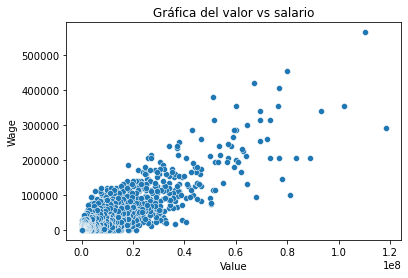

In [24]:
#Comprobamos la correlación|
sns.scatterplot(data=fifa_df, x='Value', y='Wage').set_title('Gráfica del valor vs salario')

Text(0.5, 1.0, 'Distribución de las calificaciones de los jugadores')

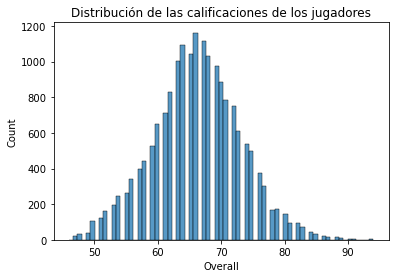

In [25]:
sns.histplot(data=fifa_df, x="Overall").set_title('Distribución de las calificaciones de los jugadores')

In [26]:
fifa_df.Overall.describe()

count    18147.000000
mean        66.253926
std          6.913320
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

El nivel general de todos los jugadores está normalmente distribuido, con una media de 66.24 y una desviación estandar de 6.9

Text(0.5, 1.0, 'Gráfica del valor vs calificación general')

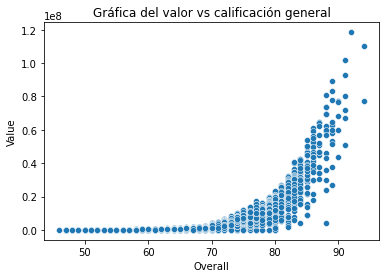

In [27]:
sns.scatterplot(data=fifa_df, x='Overall', y='Value').set_title('Gráfica del valor vs calificación general')

El precio de los jugadores se empieza a disparar cuando ellos tienen un nivel general por encima de 70 aproximadamente, por lo que puede ser un buen indicador de jugadores con calidad futbolística

Text(0.5, 1.0, 'Distribución de las edades de los jugadores')

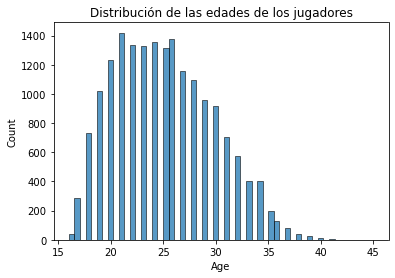

In [28]:
sns.histplot(data=fifa_df, x="Age").set_title('Distribución de las edades de los jugadores')

Las edades de los jugadores tienen un sesgo positivo, debido a que hay mayor actividad en jugadores entre 20 y 26 años. De ahí en adelante se va reduciendo la cantidad de jugadores porque se van acercando a la edad de retiro.

Text(0.5, 1.0, 'Gráfico de calificación general vs edades')

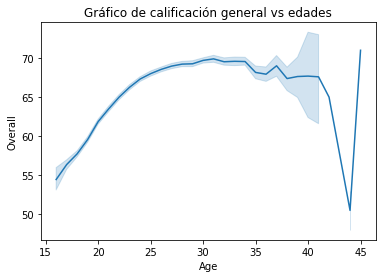

In [29]:
sns.lineplot(data=fifa_df, x="Age", y='Overall').set_title('Gráfico de calificación general vs edades')

Sin embargo, la calidad en general de los jugadores se mantiene hasta aproximadamente los 33 años. Supongo que a partir de ahí muchos empiezan a retirarse por el desgaste físico sobre el tiempo.

Text(0.5, 1.0, 'Distribución del valor de los jugadores')

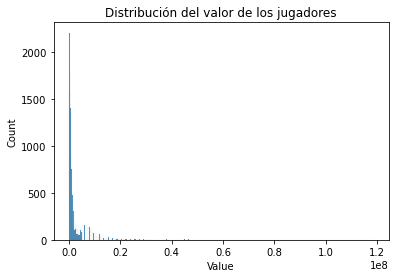

In [30]:
sns.histplot(data=fifa_df, x="Value").set_title('Distribución del valor de los jugadores')

Text(0.5, 1.0, 'Distribución del salario de los jugadores')

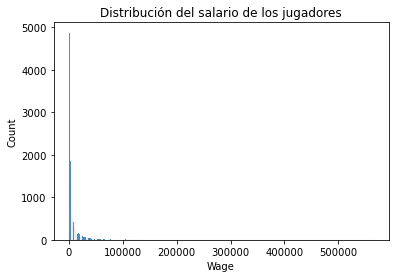

In [31]:
sns.histplot(data=fifa_df, x="Wage").set_title('Distribución del salario de los jugadores')

La distribución tanto el precio como los salarios de los jugadores tienen un muy marcado sesgo positivo. Esto se ve influenciado mayormente por los futbolístas estrellas que reciben sueldos demasiado mayores comparados con el futbolista promedio

<AxesSubplot:xlabel='Name'>

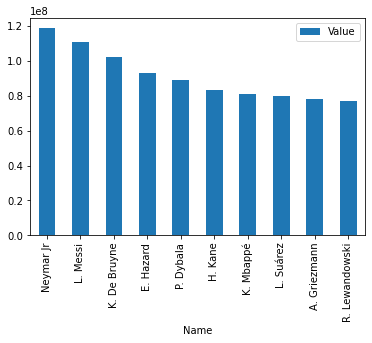

In [32]:
#Top 10 jugadores más costosos
fifa_df.sort_values("Value", ascending=False)[['Name','Value']].head(10).plot(kind='bar', x='Name')

<AxesSubplot:xlabel='Name'>

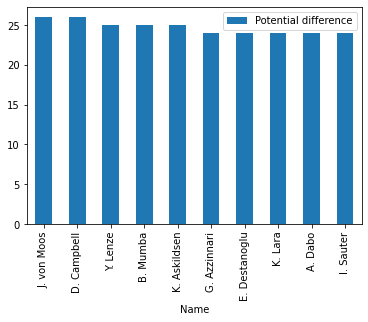

In [33]:
# Top 10 jugadores con mejor diferencia entre potencial y calificación general
fifa_df.sort_values(by='Potential difference', ascending= False)[['Name','Potential difference']].head(10).plot(kind='bar', x='Name')

In [34]:
Highest_Overall = fifa_df.Overall.quantile(0.7) 
Highest_Potential = fifa_df.Potential.quantile(0.7) 

print(f"Percentil 70 en Overall: {Highest_Overall} \nPercentil 70 en Overall: {Highest_Potential}")

Percentil 70 en Overall: 70.0 
Percentil 70 en Overall: 74.0


## Filtrado de datos para encontrar jugadores promesa baratos

Acorde al análisis realizado se determina que los jugadores que se buscan para el club requieren las siguientes condiciones:

* Tengan menos de 27 años, puesto que en adelante empiezan a bajar su nivel. 
* Tengan calificación general mayor o igual al percentil 70 (Overall >= 70), ya que aquí está el top 30% de los mejores jugadores. 
* Tengan potencial mayor o igual al percentil 70 (Potential >= 74), ya que aquí está el top 30% de los mejores jugadores a futuro. 
* Demuestren que tienen futuro potencial (Potential difference > 0)
* Cuesten menos de 2 millones 
* Tengan un salario menor a 10 mil 

Los valores del precio y salario del jugador podrán ser modificados acorde a la situación económica del club. 



In [35]:
edad_limite_promesa = 26 
precio_dispuesto_a_pagar = 2000000
salario_dispuesto_a_pagar = 10000

In [36]:
fifa_promesas_df = fifa_df[(fifa_df.Age <= edad_limite_promesa) & (fifa_df.Overall >= Highest_Overall) & (fifa_df.Potential >= Highest_Potential) & (fifa_df['Potential difference'] > 0) & (fifa_df.Value < precio_dispuesto_a_pagar) & (fifa_df.Wage < salario_dispuesto_a_pagar) ]

In [37]:
fifa_promesas_df.shape

(45, 48)

Hay 45 jugadores promesas que cumplen con las condiciones estipuladas.

<AxesSubplot:>

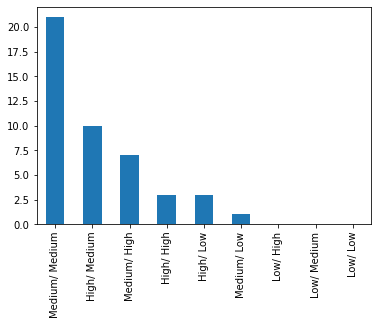

In [38]:
fifa_promesas_df['Work Rate'].value_counts().plot(kind='bar')

Como era de esperarse, la mayoría de jugadores tienen un ratio de trabajo medio o superior. Lo que desmuestra su calidad futbolística. 

## Modelo de ML para predecir el valor de los jugadores

Un equipo de fútbol promedio tiene aproximadamente 20 jugadores (11 titulares y 9 para rotaciones),  por lo que haré un modelo de Machine Learning que prediga el precio de los jugadores para así determinar cuáles son los 20 que generan las mejores ganancias.

#### Se divide el dataset entre train/split y se dejan las variables numéricas y categóricas (a excepción de Value)

In [39]:
# Encoding para las variables categóricas
fifa_df['Work Rate'] = fifa_df['Work Rate'].cat.codes
fifa_df['Position'] = fifa_df['Position'].cat.codes

#Split

X = fifa_df[['Age', 'Wage','Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 
             'Position', 'Height', 'Weight', 'Crossing', 'Finishing',
             'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
             'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
             'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
             'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
             'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
             'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
             'GKKicking', 'GKPositioning', 'GKReflexes', 'Potential difference']]
y = fifa_df['Value']

#Se elige la técnica de dividir 20% Test, 80% training ya que el dataset es pequeño
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Multiple linear regression

In [40]:
# Training the Multiple Linear Regression model on the Training set
LR_regressor = LinearRegression()
LR_regressor.fit(X_train, y_train)

LinearRegression()

#### Decision Tree Regression

In [41]:
# Training the Decision Tree Regression model on the Training set
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

#### Random Forest Regression model

In [42]:
import numpy as np

In [43]:
# Training the Random Forest Regression model on the Training set
RF_regressor = RandomForestRegressor(n_estimators = 100)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
LR_y_pred = LR_regressor.predict(X_test)
DT_y_pred = DT_regressor.predict(X_test)
RF_y_pred = RF_regressor.predict(X_test)

In [45]:
len(RF_y_pred)

3630

In [46]:
mse = mean_squared_error(y_test, LR_y_pred)
score = r2_score(y_test, LR_y_pred)
print('Accuracy:',format(score * 100,'.2f'),'%','\nRMSE: ', format(np.sqrt(mse),'2f'))

Accuracy: 78.45 % 
RMSE:  2558806.622877


In [47]:
mse = mean_squared_error(y_test, DT_y_pred)
score = r2_score(y_test, DT_y_pred)
print('Accuracy:',format(score * 100,'.2f'),'%','\nRMSE: ', format(np.sqrt(mse),'2f'))

Accuracy: 97.71 % 
RMSE:  833366.628811


In [48]:
mse = mean_squared_error(y_test, RF_y_pred)
score = r2_score(y_test, RF_y_pred)
print('Accuracy:',format(score * 100,'.2f'),'%', '\nRMSE: ', format(np.sqrt(mse),'2f'))

Accuracy: 98.42 % 
RMSE:  692039.017943


Los resultados se desempeñan mejor aplicando Random Forest, por lo que se optimizarán los hiperparámetros para definir el modelo final. 

#### Optimizando el modelo con grid search

In [49]:
# Hiperparámetros a evaluar
param_grid = [
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 3, 4, 5, 6, 7, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100], 'max_features': [2, 3, 4, 5, 6, 7, 8]},
  ]

# Se crea el modelo variando los hiperparámetros
RF_regressor = RandomForestRegressor()

grid_search = GridSearchCV(RF_regressor, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 5, 6, 7, 8],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 5, 6, 7, 8],
                          'n_estimators': [3, 10, 30, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 30}

In [51]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=30)

In [52]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2421341.715140017 {'max_features': 2, 'n_estimators': 3}
1934906.9222327054 {'max_features': 2, 'n_estimators': 10}
1716224.62127499 {'max_features': 2, 'n_estimators': 30}
1718954.909060598 {'max_features': 2, 'n_estimators': 100}
2169800.6646482516 {'max_features': 3, 'n_estimators': 3}
1688136.5633243911 {'max_features': 3, 'n_estimators': 10}
1554246.804368162 {'max_features': 3, 'n_estimators': 30}
1531408.4592928893 {'max_features': 3, 'n_estimators': 100}
2131978.371604504 {'max_features': 4, 'n_estimators': 3}
1591164.7808324052 {'max_features': 4, 'n_estimators': 10}
1460813.4894966334 {'max_features': 4, 'n_estimators': 30}
1440479.86607496 {'max_features': 4, 'n_estimators': 100}
1750486.7716676453 {'max_features': 5, 'n_estimators': 3}
1412586.892074849 {'max_features': 5, 'n_estimators': 10}
1340021.4895237356 {'max_features': 5, 'n_estimators': 30}
1327425.748776888 {'max_features': 5, 'n_estimators': 100}
1750773.5109602555 {'max_features': 6, 'n_estimators': 3}
1464969.

In [53]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1106482.7792267876

In [54]:
final_model_score = r2_score(y_test, final_predictions)  
print('Accuracy:',format(final_model_score*100,'.2f'),'%')

Accuracy: 95.97 %


### Prueba del modelo con los jugadores promesa

Pienso que el modelo ya puede ser probado con los datos de los jugadores promesa para estimar su valor de venta en el mercado.

In [56]:
fifa_promesas_df['Work Rate'] = fifa_promesas_df['Work Rate'].cat.codes
fifa_promesas_df ['Position'] = fifa_promesas_df['Position'].cat.codes

fifa_promesas_df_X = fifa_promesas_df[['Age', 'Overall', 'Potential', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Potential difference']]

Value_pred = final_model.predict(fifa_promesas_df_X) 

fifa_promesas_df['Value_pred'] = Value_pred

fifa_promesas_df[['Name', 'Overall', 'Potential', 'Value', 'Wage', 'Potential difference', 'Value_pred']].sort_values(by='Value_pred', ascending= False)

,Name,Overall,Potential,Value,Wage,Potential difference,Value_pred
ID,,,,,,,
207439,L. Paredes,80,85,0.0,0.0,5,1.576333e+07
225144,P. Tau,75,81,0.0,0.0,6,1.366333e+07
211231,R. Azeez,70,74,1900000.0,5000.0,4,9.666667e+06
235312,Alfonso Herrero,70,76,1800000.0,4000.0,6,9.106667e+06
237532,Rodrigo,70,74,1900000.0,6000.0,4,8.793333e+06
224977,A. Micai,70,76,1800000.0,2000.0,6,8.500000e+06
243662,Kalindi,70,74,1900000.0,5000.0,4,8.030000e+06
204030,S. Kitsiou,70,74,1900000.0,1000.0,4,7.910000e+06
218208,C. Fuentes,70,74,1900000.0,6000.0,4,7.773333e+06


Por último, crearé una nueva columna llamada ganancias, para seleccionar los 20 jugadores que el equipo adquirirá

In [57]:
fifa_promesas_df['Ganancia'] = fifa_promesas_df['Value_pred'] - fifa_promesas_df['Value'] 

In [60]:
fifa_seleccionados_df = fifa_promesas_df[['Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Potential difference', 'Value_pred', 'Ganancia']].sort_values(by='Ganancia', ascending= False).head(20)
fifa_seleccionados_df

,Name,Age,Overall,Potential,Value,Wage,Potential difference,Value_pred,Ganancia
ID,,,,,,,,,
207439,L. Paredes,24,80,85,0.0,0.0,5,1.576333e+07,1.576333e+07
225144,P. Tau,24,75,81,0.0,0.0,6,1.366333e+07,1.366333e+07
211231,R. Azeez,25,70,74,1900000.0,5000.0,4,9.666667e+06,7.766667e+06
235312,Alfonso Herrero,24,70,76,1800000.0,4000.0,6,9.106667e+06,7.306667e+06
237532,Rodrigo,25,70,74,1900000.0,6000.0,4,8.793333e+06,6.893333e+06
219740,Kahraba,24,74,79,0.0,0.0,5,6.728333e+06,6.728333e+06
224977,A. Micai,24,70,76,1800000.0,2000.0,6,8.500000e+06,6.700000e+06
243662,Kalindi,24,70,74,1900000.0,5000.0,4,8.030000e+06,6.130000e+06
204030,S. Kitsiou,24,70,74,1900000.0,1000.0,4,7.910000e+06,6.010000e+06


In [59]:
fifa_seleccionados_df["Ganancia"].sum()

137396333.3333333

### Conclusion
Recomiendo al equipo comprar los jugadores que están en la tabla anterior, ya que podrían traer ganancias aproximadas de 138M de Euros